In [428]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [429]:
df = pd.read_csv("diabetes.csv")

In [430]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

In [431]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [432]:
for columns in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
    print("Number of 0 values in",(df[columns]==0).value_counts())

Number of 0 values in Glucose
False    763
True       5
Name: count, dtype: int64
Number of 0 values in BloodPressure
False    733
True      35
Name: count, dtype: int64
Number of 0 values in SkinThickness
False    541
True     227
Name: count, dtype: int64
Number of 0 values in Insulin
False    394
True     374
Name: count, dtype: int64
Number of 0 values in BMI
False    757
True      11
Name: count, dtype: int64


In [433]:
for columns in ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]:
    df[columns] = df[columns].replace(0,np.nan)

In [434]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

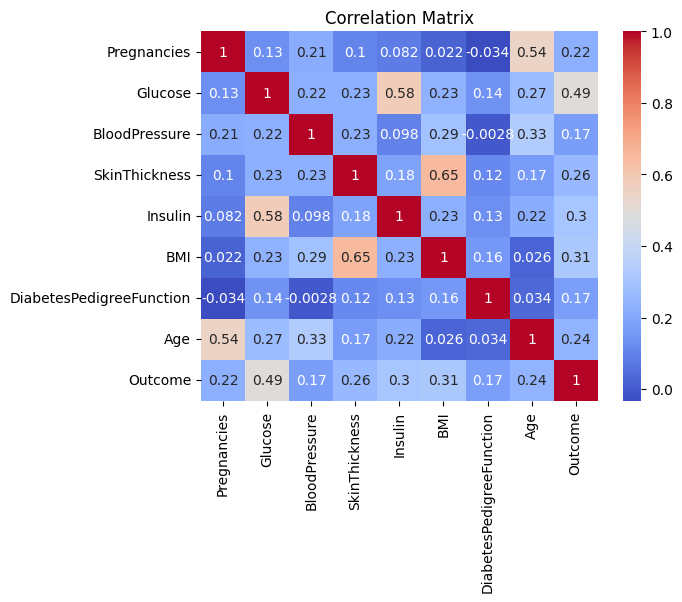

In [435]:
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

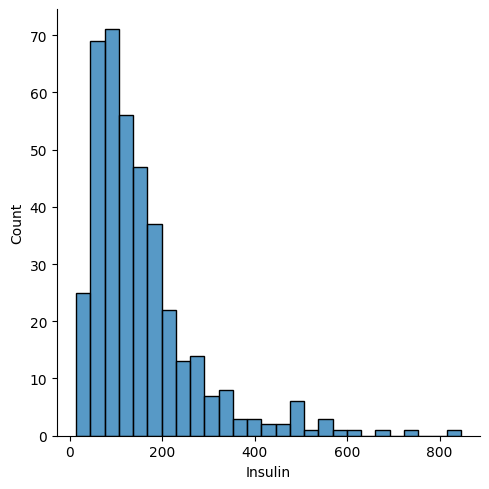

In [436]:
sns.displot(x=df["Insulin"])

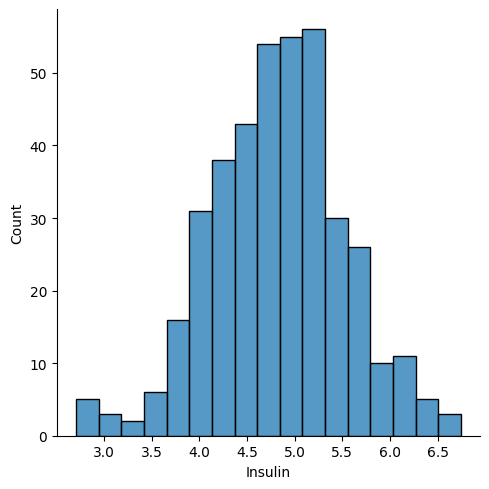

In [437]:
df["Insulin"] = np.log1p(df["Insulin"])
sns.displot(x=df["Insulin"])

In [438]:
df["Insulin"] = df["Insulin"].fillna(df["Insulin"].mean())

<Axes: xlabel='SkinThickness'>

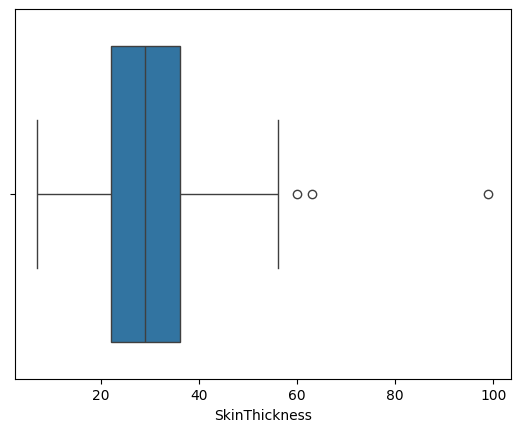

In [439]:
sns.boxplot(x=df["SkinThickness"])

In [440]:
df = df[~(df["SkinThickness"]>56)]

In [441]:
df["SkinThickness"] = df["SkinThickness"].fillna(df["SkinThickness"].mean())
df.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

In [442]:
q1 = df["BloodPressure"].quantile(0.25)
q3 = df["BloodPressure"].quantile(0.75)
IQR = q3 - q1
alt_sinir = q1 - 1.5*IQR
ust_sinir = q3 + 1.5*IQR

In [443]:
df["BloodPressure"] = df["BloodPressure"].fillna(df["BloodPressure"].mean())

In [444]:
q1 = df["BMI"].quantile(0.25)
q3 = df["BMI"].quantile(0.75)
IQR = q3 - q1
alt_sinir = q1 - 1.5*IQR
ust_sinir = q3 + 1.5*IQR

In [445]:
df = df[~(df["BMI"]>ust_sinir)]

In [446]:
df["BMI"] = df["BMI"].fillna(df["BMI"].mean())

In [447]:
df["Glucose"] = df["Glucose"].fillna(df["Glucose"].mean())

In [448]:
scaler = StandardScaler()

columns_to_scale = ["Glucose", "BMI", "BloodPressure", "SkinThickness"]

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [449]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lr = LogisticRegression(max_iter=300)
model = lr.fit(X_train,y_train)

In [450]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7763157894736842
Confusion Matrix:
 [[89 13]
 [21 29]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       102
           1       0.69      0.58      0.63        50

    accuracy                           0.78       152
   macro avg       0.75      0.73      0.74       152
weighted avg       0.77      0.78      0.77       152



In [451]:
lr = LogisticRegression(max_iter=300,class_weight='balanced')
model = lr.fit(X_train,y_train)

In [452]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7236842105263158
Confusion Matrix:
 [[72 30]
 [12 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.71      0.77       102
           1       0.56      0.76      0.64        50

    accuracy                           0.72       152
   macro avg       0.71      0.73      0.71       152
weighted avg       0.76      0.72      0.73       152



In [453]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42,class_weight='balanced')

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

Accuracy: 0.75
Confusion Matrix:
 [[82 20]
 [18 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       102
           1       0.62      0.64      0.63        50

    accuracy                           0.75       152
   macro avg       0.72      0.72      0.72       152
weighted avg       0.75      0.75      0.75       152



In [454]:
param_grid = {
    'n_estimators': [100, 200, 300],       # Ağaç sayısı
    'max_depth': [None, 5, 10, 20],        # Maksimum derinlik
    'min_samples_split': [2, 5, 10],       # Dallanma için minimum örnek
    'min_samples_leaf': [1, 2, 4],         # Yaprak için minimum örnek
    'class_weight': ['balanced']          # Sınıf dengesine duyarlılık
}

In [455]:
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("En iyi F1 skoru:", grid_search.best_score_)
print("En iyi parametreler:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
En iyi F1 skoru: 0.6901293028887736
En iyi parametreler: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}


In [456]:
best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

Confusion Matrix:
 [[71 31]
 [ 8 42]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.70      0.78       102
           1       0.58      0.84      0.68        50

    accuracy                           0.74       152
   macro avg       0.74      0.77      0.73       152
weighted avg       0.79      0.74      0.75       152

